<a href="https://colab.research.google.com/github/katerinbarrera21/Simulacion/blob/main/tareas2/10trabajoCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el ámbito educativo, la ministra María Brown anunció que en el régimen Sierra-Amazonía, para el segundo quimestre, que inicia el 7 de febrero, se autorizó el retorno a clases presenciales con un aforo del 100%, para estudiantes de bachillerato; mientras que para los estudiantes de educación de básica elemental y básica media el retorno será voluntario.

Asimismo, para niños menores de 5 años de las unidades educativas que estén en cantones con semáforos verde y amarillo, el retorno será voluntario con un aforo máximo de 2.25m2 por persona.

En semáforo rojo, el aforo para el regreso a las aulas de manera voluntaria será del 50%, de acuerdo a la capacidad física disponible del establecimiento.

Para el régimen Costa-Galápagos se mantendrán vigente el retorno voluntario a la presencialidad.

Las instituciones y CDI particulares, fiscomisionales y municipales podrán acogerse a las disposiciones antes detalladas o podrán llegar a un acuerdo con la comunidad para retomar la presencialidad de todos los estudiantes cuando el cantón se encuentre en semáforos verde o amarillo.

Practica.

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

* Calcular e Identificar el aforo máximo permitido en la institución educativa.
* Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
* Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
* Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
* Realizar con un tiempo de un 1 mes.
Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

Nota: No tomar datos de transporte, numero de aulas, personal docente, etc. Solo se el ingreso, salida y el contagio dentro del establecimiento.

In [ ]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 

In [ ]:
AFOROMAX= 500
tiempoSimulacion= 360*31
porcentajeContagio= 0.05
duracionClases=360
contDia=1
tiempoEnClases=0
estudiantesContagiados= {}
estudiantesTotalesPorDia=0
infectadosTotales=0
totalEst= {}
contEst=0
total=0
class escuela(object):
  def __init__(self, env, aforoMax):
    self.env = env
    self.aforoMax = simpy.Resource(env, aforoMax)

  def duracionClases(self,duracionClases):
    yield self.env.timeout(duracionClases)

def entradaEscuela(env, escuela, porcentajeContagio, contDia ):
  with escuela.aforoMax.request() as aforoMax:
    print("entrando a la escuela")
    yield aforoMax
    contEstContagiado=0
    print("aforo disponible entra escuela")
    yield env.process(escuela.duracionClases(duracionClases))
    print ("duracion de clases aumento de probabilidad contagio")
    cont= 0
    if (tiempoEnClases < 60):
      print("tiempo contagio 1 hora ")
      contagioV = stats.bernoulli(porcentajeContagio)
      contEstContagiado = contagioV.rvs(1)
      print ("Infectado", contEstContagiado)
      cont=cont+1
    elif (tiempoEnClases>60 and tiempoEnClases<=120):
      porcentajeContagio=porcentajeContagio+0.05
      print("tiempo contagio 2 horas")
      contagioV = stats.bernoulli(porcentajeContagio)
      contEstContagiado = contagioV.rvs(1)
      print ("Infectado ", contEstContagiado)
      cont=cont+1

    elif (tiempoEnClases>120 and tiempoEnClases<=180):
      porcentajeContagio=porcentajeContagio+0.05
      print("tiempo contagio 3 horas ")
      contagioV = stats.bernoulli(porcentajeContagio)
      contEstContagiado = contagioV.rvs(1)
      print ("Infectado ", contEstContagiado)
      cont=cont+1

    elif (tiempoEnClases>180 and tiempoEnClases<=240):
      porcentajeContagio=porcentajeContagio+0.05
      print("tiempo contagio 4 horas ")
      contagioV = stats.bernoulli(porcentajeContagio)
      contEstContagiado = contagioV.rvs(1)
      print ("Infectado ", contEstContagiado)
      cont=cont+1


    elif (tiempoEnClases>240 and tiempoEnClases<=300):
      porcentajeContagio=porcentajeContagio+0.05
      print("tiempo contagio 5 horas ")
      contagioV = stats.bernoulli(porcentajeContagio)
      contEstContagiado = contagioV.rvs(1)
      print ("Infectado ", contEstContagiado)
      cont=cont+1


    elif (tiempoEnClases>300 and tiempoEnClases<=360):
      porcentajeContagio=porcentajeContagio+0.05
      print("tiempo contagio 6 horas ")
      contagioV = stats.bernoulli(porcentajeContagio)
      contEstContagiado = contagioV.rvs(1)
      print ("Infectado ", contEstContagiado)
      cont=cont+1

    if (contEstContagiado == 1):
      if contDia in estudiantesContagiados.keys():
         estudiantesContagiados[contDia] += 1
         print ("Infectados DIA ", estudiantesContagiados)
      else:
         estudiantesContagiados[contDia]= 1

    if (contEstContagiado == 1 or contEstContagiado==0):
      nolograronEntrar= random.randint(0,8)
      if (nolograronEntrar < 7):
        if contDia in totalEst.keys():
          totalEst[contDia] += 1
          print ("ESTUDIANTES ", totalEst)
        else:
          totalEst[contDia]= 1 
   


def ejecutar_simulacion(env,aforoMax):
  objEscuela=escuela(env, aforoMax)
  global estudiantesContagiados
  global contDia

  global tiempoEnClases
  global estudiantesTotalesPorDia
  global totalEst
  global contEst

  while True:
        tiempoEnClases= tiempoEnClases+ 1
        yield env.timeout(1)
        env.process(entradaEscuela(env,objEscuela,porcentajeContagio,contDia))
        
        if tiempoEnClases==duracionClases:
            contDia += 1
            tiempoEnClases = 0

env = simpy.Environment()
env.process(ejecutar_simulacion(env,AFOROMAX))
env.run(until=tiempoSimulacion)
print(estudiantesContagiados)




Se han truncado las últimas 5000 líneas del flujo de salida.
aforo disponible entra escuela
entrando a la escuela
duracion de clases aumento de probabilidad contagio
tiempo contagio 4 horas 
Infectado  [0]
ESTUDIANTES  {1: 277, 2: 275, 3: 285, 4: 285, 5: 291, 6: 270, 7: 288, 8: 282, 9: 276, 10: 291, 11: 295, 12: 271, 13: 283, 14: 270, 15: 288, 16: 272, 17: 275, 18: 290, 19: 281, 20: 285, 21: 285, 22: 275, 23: 275, 24: 280, 25: 276, 26: 261, 27: 275, 28: 173}
aforo disponible entra escuela
entrando a la escuela
duracion de clases aumento de probabilidad contagio
tiempo contagio 4 horas 
Infectado  [1]
Infectados DIA  {1: 38, 2: 35, 3: 32, 4: 45, 5: 26, 6: 35, 7: 35, 8: 39, 9: 34, 10: 28, 11: 28, 12: 34, 13: 31, 14: 31, 15: 41, 16: 29, 17: 33, 18: 26, 19: 28, 20: 28, 21: 30, 22: 36, 23: 31, 24: 49, 25: 33, 26: 33, 27: 22, 28: 20}
ESTUDIANTES  {1: 277, 2: 275, 3: 285, 4: 285, 5: 291, 6: 270, 7: 288, 8: 282, 9: 276, 10: 291, 11: 295, 12: 271, 13: 283, 14: 270, 15: 288, 16: 272, 17: 275, 18

Realizar con un tiempo de un 1 mes. Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

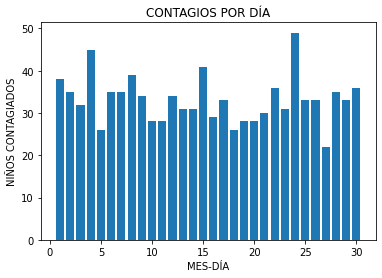

In [ ]:
etiqueta = list(estudiantesContagiados.keys())
valores = list(estudiantesContagiados.values())
plt.bar(etiqueta, valores, align="center")
plt.title("CONTAGIOS POR DÍA")
plt.xlabel("MES-DÍA")
plt.ylabel("NIÑOS CONTAGIADOS")
plt.show()


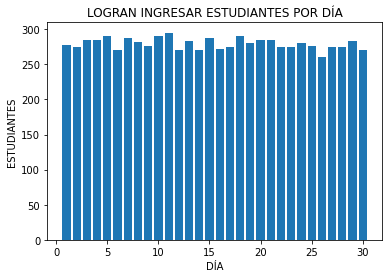

In [ ]:
etiqueta = list(totalEst.keys())
valores = list(totalEst.values())
plt.bar(etiqueta, valores, align="center")
plt.title("LOGRAN INGRESAR ESTUDIANTES POR DÍA")
plt.xlabel("DÍA")
plt.ylabel("ESTUDIANTES")
plt.show()